<div style="background-color:#96CDF2; padding:10px;color:#3B3C3E">
Licence <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">CC BY-SA</a>
<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0; float:right;" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />
Germain Salvato Vallverdu - <tt>germain.vallverdu@univ-pau.fr</tt> <br />
<i><a href="http://iprem.univ-pau.fr/fr/index.html">IPREM</a> / <a href="http://www.univ-pau.fr/">Univ Pau &amp; Pays Adour</a></i>
</div>

# Chercher les racines d'une fonction

L'objectif de ce TP est de mettre en pratique le langage python pour chercher les racines d'une fonction.

## Introduction

Commençons par importer quelques modules python. Le module `numpy` contient, entre autres, toutes les fonctions mathématiques.

In [1]:
import numpy as np

In [2]:
np.exp(2)

7.38905609893065

Le logarithme népérien ou naturel est noté `log` :

In [3]:
np.log(2)

0.6931471805599453

Le logarithme décimal est noté `log10`.

In [4]:
np.log10(10)

1.0

### Cahier des charges

Le programme que nous allons écrire devra réaliser les opérations suivantes :

* Définir une fonction de x
* Définir l'intervalle de recherche d'une racine de cette fonction ou une valeur initiale
* Trouver la ou les racines de la fonction

### Égalité entre deux nombres réels

En informatique un nombre réel n'a jamais une valeur exacte, il existe toujours un arrondi. Cet arrondi dépend de la quantité de mémoire utilisée pour enregistrer ce nombre.

On parle quelques fois de réels simple précision ou double précision, enregistrés respectivement sur 4 ou 8 octets (32 ou 64 bits). Les réels simples précisions permettent de décrire 7 chiffres significatifs dans un intervalle entre $10^{\pm38}$. Les réels double précisions permettent de décrire 14 chiffres significatifs dans un intervalle $10^{\pm308}$.

Pour savoir si deux nombres réels sont égaux, on va définir un critère, un seuil. On considèrera que les nombres sont égaux si la différence, en valeur absolue, entre ceux-ci est plus petites que le seuil (*threshold* en anglais). Le seuil permettra donc de définir également la précision avec laquelle on obtiendra la racine de la fonction. Bien évidemment, le seuil ne peut être plus petit que le plus petit nombre pouvant être représenté en mémoire.

### Fonctions et représentation graphique

Dans ce TP vous aurez besoin de définir une fonction. Nous avons déjà vu cette notion précédemment. Par ailleurs, il est pratique de tracer la courbe représentative de cette fonction pour visualiser la racine. 

Nous verrons plus tard dans le cours comment faire des représentations graphiques avec python en utilisant la librairie matplotlib. Voici ci-dessous quelques lignes que vous pouvez recopier, chaque fois que vous souhaitez visualiser votre fonction. Commençons par charger le module `matplotlib` :

In [5]:
# import matplotlib module
# do it only one time
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 18

Définissons la fonction
$$f : x \longrightarrow \ln x \; e^{-x}$$

In [6]:
def ma_fonction(x):
    return np.log(x) * np.exp(-x)

On trace maintenant la fonction sur l'intervalle $x\in[0.5; 5]$

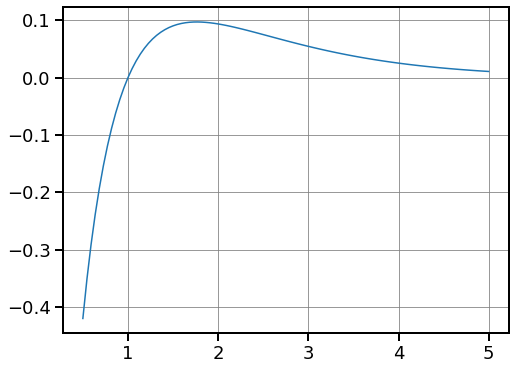

In [7]:
x = np.linspace(0.5, 5, 100)
plt.plot(x, ma_fonction(x))

## Méthode par dicothomie

[La méthode de dicothomie](http://www.bibmath.net/dico/index.php?action=affiche&quoi=./d/dichotomie.html) est une méthode permettant de trouver une solution approchée d'une équation du type
$$ f(x) = 0$$
Dans cette partie, vous allez programmer cet algorithme pour résoudre l'équation de votre choix. On pourra utiliser les équations dites transcendantes pour lesquelles il est le plus souvent impossible de trouver une solution. Par exemple :
\begin{align*}
    x & = e^{-x} &
    \ln(x) \, e^{-x} & = 0 &
    \sin x & = kx
\end{align*}
Vous pouvez égaement définir comme fonction un polynôme de degré supérieur ou égal à 3 pour lequel il existe 2 ou 3 racines.

Définir la fonction correspondant à l'équation à résoudre :

In [8]:
def ma_fonction(x):
    return np.log(x) * np.exp(-x)

<div class="alert alert-success">

**Exercice :**  Déterminer la racine de la fonction $\ln x \; e^{-x}$ dans l'intervalle $ x\in[0.5 ; 3]$ en utilisant la méthode de dicothomie.

</div>

In [9]:
# define interval
a = 0.5
b = 3

# select function
fct_to_solve = ma_fonction

# Check if the function cancel 0 in the interval
if fct_to_solve(a) * fct_to_solve(b) > 0:
    raise ValueError("The function does not cancel in the interval")
    
# convergence threshold
threshold = 1e-5

# max number of iterations
max_try = 1000

# number of iteration
ntry = 0

# initialization of delta
delta = abs(fct_to_solve(a) - fct_to_solve(b))

# interval initialization
# check x1 < x2
x1 = min(a, b)
x2 = max(a, b)

print(f'{"#":4s} {"f(x)":>12s} {"x1":>12s} {"x2":>12s} {"|x2-x1]":>12s} {"criteria":>12s}')
print("-" * 70)
while (ntry <= max_try and delta > threshold):
    # milieu de [x1 ; x2]
    xm = (x1 + x2) / 2
    fct_xm = fct_to_solve(xm)
    fct_x1 = fct_to_solve(x1)
    fct_x2 = fct_to_solve(x2)
    
    # selection
    if fct_xm * fct_x1 > 0:
        # the function does not cancel in [x1 ; xm]
        x1 = xm
    else:
        # the function does not cancel in [xm ; x2]
        x2 = xm
        
    # increment the number if iteration
    ntry += 1
    
    # convergence criteria
    delta = np.abs(fct_x1 - fct_x2)
    
    print(f"{ntry:4d} {fct_xm:12.4e} {x1:12.4e} {x2:12.4e} {delta:12.4e} {threshold:12.4e}")

#            f(x)           x1           x2      |x2-x1]     criteria
----------------------------------------------------------------------
   1   9.7247e-02   5.0000e-01   1.7500e+00   4.7511e-01   1.0000e-05
   2   3.8239e-02   5.0000e-01   1.1250e+00   5.1766e-01   1.0000e-05
   3  -9.2139e-02   8.1250e-01   1.1250e+00   4.5865e-01   1.0000e-05
   4  -1.2050e-02   9.6875e-01   1.1250e+00   1.3038e-01   1.0000e-05
   5   1.6081e-02   9.6875e-01   1.0469e+00   5.0289e-02   1.0000e-05
   6   2.8406e-03   9.6875e-01   1.0078e+00   2.8131e-02   1.0000e-05
   7  -4.3877e-03   9.8828e-01   1.0078e+00   1.4891e-02   1.0000e-05
   8  -7.2062e-04   9.9805e-01   1.0078e+00   7.2283e-03   1.0000e-05
   9   1.0730e-03   9.9805e-01   1.0029e+00   3.5612e-03   1.0000e-05
  10   1.7950e-04   9.9805e-01   1.0005e+00   1.7937e-03   1.0000e-05
  11  -2.6974e-04   9.9927e-01   1.0005e+00   9.0012e-04   1.0000e-05
  12  -4.4915e-05   9.9988e-01   1.0005e+00   4.4924e-04   1.0000e-05
  13   6.7342e-05  

<div class="alert alert-success">

**Exercice :**  Reprendre la méthode de dicothomie avec une autre fonction. Essayez d'utiliser une fonction avec plusieurs racines.
</div>

## Méthode de Newton-Raphton

La [méthdoe de Newton-Raphton](http://www.bibmath.net/dico/index.php?action=affiche&quoi=./n/newton_meth.html) est une autre méthode permettant de trouver la racine d'une fonction dans un intervalle. À partir d'une valeur initiale cette méthode utilise la tangeante à la courbe pour déterminer l'abscisse suivante en définissant une suite de la forme :
$$
x_{n+1} = x_n - \frac{f(x_n)}{f'(x_n)}
$$
Cette méthode nécessite donc de calculer la dérivée première de la fonction.

<div class="alert alert-success">

**Exercice :**
* définir une fonction calcule les valeurs de la fonction
* définir une fonction qui calcule les valeurs de la dérivée de la fonction
* appliquer la formule de récurrence pour trouver la racine de la fonction
</div>

In [10]:
def ma_fonction(x):
    return np.log(x) * np.exp(-x)

In [11]:
def ma_fonction_prime(x):
    return np.exp(-x) / x - np.log(x) * np.exp(-x)

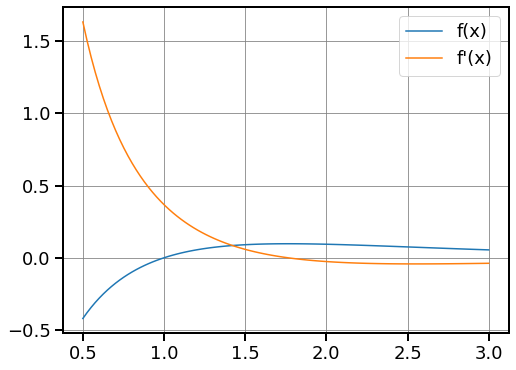

In [12]:
x = np.linspace(0.5, 3, 100)
plt.plot(x, ma_fonction(x), label="f(x)")
plt.plot(x, ma_fonction_prime(x), label="f'(x)")
plt.legend()

In [13]:
# initial value
x0 = 0.5

# select function
fct = ma_fonction
fct_p = ma_fonction_prime
    
# convergence threshold
threshold = 1e-5

# max number of iterations
max_try = 1000

# number of iteration
ntry = 0

# initialisation 
x_old = x0
x_new = x0

# initialization of delta
delta = abs(fct(x_old))

print(f'{"#":4s} {"f(x)":>12s} {"x_old":>12s} {"x_new":>12s} {"|x_old-x_new]":>12s} {"criteria":>12s}')
print("-" * 70)
while (ntry <= max_try and delta > threshold):
    # compute x_new
    x_new = x_old - fct(x_old) / fct_p(x_old)
        
    # increment the number if iteration
    ntry += 1
    
    # convergence criteria
    delta = np.abs(fct(x_old) - fct(x_new))
    
    print(f"{ntry:4d} {fct(x_new):12.4e} {x_old:12.4e} {x_new:12.4e} {delta:12.4e} {threshold:12.4e}") 
    
    x_old = x_new

#            f(x)        x_old        x_new |x_old-x_new]     criteria
----------------------------------------------------------------------
   1  -1.3031e-01   5.0000e-01   7.5737e-01   2.9011e-01   1.0000e-05
   2  -2.8068e-02   7.5737e-01   9.3125e-01   1.0224e-01   1.0000e-05
   3  -2.4317e-03   9.3125e-01   9.9345e-01   2.5636e-02   1.0000e-05
   4  -2.3455e-05   9.9345e-01   9.9994e-01   2.4082e-03   1.0000e-05
   5  -2.2426e-09   9.9994e-01   1.0000e+00   2.3453e-05   1.0000e-05
   6  -4.0843e-17   1.0000e+00   1.0000e+00   2.2426e-09   1.0000e-05


## Utilisation de la librairie `scipy`

[`scipy`](https://docs.scipy.org/doc/scipy/reference/index.html) est une librairie python qui met à disposition de nombreux outils mathématiques. Les outils permettant de chercher des racines d'une fonction font partie [des méthodes d'optimisation](https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html). Ces méthodes regroupent la recherche d'extrema, de racines, de moindres carrés...

Apprendre à utiliser une libraire, comme `scipy`, est une part importante de l'apprentissage de python. En fonction de votre discipline vous vous spécialiserez dans les librairies associés aux problématiques de votre discipline. Il faut donc savoir lire la documentation d'une fonction et apprendre à l'utiliser.

Les deux algorithmes que nous venons de voir sont disponibles dans la librairie `scipy`. La fonction [`root_scalar`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root_scalar.html#scipy.optimize.root_scalar) regroupe différentes méthodes. Nous pouvons l'importer de la façon suivante :

In [14]:
from scipy.optimize import root_scalar

<div class="alert alert-success">

**Exercice :** Lire la documentation de la fonction `root_scalar` sur scipy et essayez de retrouver les racines de votre fonction en utilisant différentes méthodes. En particulier vous utiliserez des méthodes nécessitant ou non le calcul de la dérivée première.
    
Comparez les résultats obtenus mais aussi le nombre d'itération et le nombre d'appel aux fonctions.
    
Vous pouvez également utiliser la commande magique `%timeit` pour évaluer le temps d'exécution.
</div>

Pour rappel, la documentation est accessible depuis le site de scipy, ou depuis jupyter en plaçant un `?` après la fonction et en exécutant la cellule.

In [15]:
results = root_scalar(ma_fonction, bracket=[0.5, 3])

In [16]:
print(results)

      converged: True
           flag: 'converged'
 function_calls: 11
     iterations: 10
           root: 1.0


In [17]:
results = root_scalar(ma_fonction, x0=0.5, fprime=ma_fonction_prime)

In [18]:
print(results)

      converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 6
           root: 0.9999999999999999
